In [ ]:
! unzip '/content/drive/MyDrive/archive (1).zip'


Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

In [ ]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from glob import glob
    from tensorflow.keras.layers import Dense, Flatten, Input
    from tensorflow.keras.models import Model
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
    from tensorflow.keras.applications.xception import Xception, preprocess_input





In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
IMG_SIZE = 180
IMAGE_SIZE=[180,180]
DIM =(IMG_SIZE,IMG_SIZE)
ZOOM=[0.99,1.01]
BRIGHT_RANGE=[0.8,1.2]
HORZ_FLIP = True
FILL_MODE='constant'
DATA_FORMAT='channels_last'
work_dir='/content/drive/MyDrive/Alzheimer_s Dataset/train'
work_dr=ImageDataGenerator(rescale=1./255,
brightness_range=BRIGHT_RANGE,
zoom_range=ZOOM,
data_format=DATA_FORMAT,
fill_mode=FILL_MODE,
horizontal_flip=HORZ_FLIP)


In [ ]:
data_gen = work_dr.flow_from_directory(directory=work_dir,target_size=DIM, batch_size=6500,shuffle=False)

Found 5161 images belonging to 4 classes.


In [ ]:
train_data,train_labels=data_gen.next()

In [ ]:
print(train_data.shape,train_labels.shape)

(5161, 180, 180, 3) (5161, 4)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1,IMG_SIZE*IMG_SIZE*3),train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)


(10360, 180, 180, 3) (10360, 4)


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)


In [ ]:
IMAGE_SIZE=[180,180]


In [ ]:
xcep_model = Xception(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)
for layer in xcep_model.layers:
    layer.trainable=False

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in xcep_model.layers:
    layer.trainable=False

NameError: ignored

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D,Dropout

custom_inception_model = Sequential([
        xcep_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4,activation='softmax')
], name='inception_cnn_model')

In [ ]:
custom_inception_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 dropout (Dropout)           (None, 6, 6, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 512)       

In [ ]:
history=custom_inception_model.fit(train_data,train_labels,epochs=30,batch_size=10,verbose=1,validation_data=(test_data,test_labels))

Epoch 1/30
663/663 [==============================] - 1289s 2s/step - loss: 1.4905 - accuracy: 0.3517 - val_loss: 0.9978 - val_accuracy: 0.5497
Epoch 2/30
663/663 [==============================] - 1267s 2s/step - loss: 1.1227 - accuracy: 0.4821 - val_loss: 0.8231 - val_accuracy: 0.6100
Epoch 3/30
663/663 [==============================] - 1265s 2s/step - loss: 0.9905 - accuracy: 0.5436 - val_loss: 0.7516 - val_accuracy: 0.6564
Epoch 4/30
663/663 [==============================] - 1241s 2s/step - loss: 0.9282 - accuracy: 0.5811 - val_loss: 0.7112 - val_accuracy: 0.6670
Epoch 5/30
663/663 [==============================] - 1260s 2s/step - loss: 0.8990 - accuracy: 0.5958 - val_loss: 0.6965 - val_accuracy: 0.6771
Epoch 6/30
663/663 [==============================] - 1241s 2s/step - loss: 0.8687 - accuracy: 0.6044 - val_loss: 0.7134 - val_accuracy: 0.6815
Epoch 7/30
663/663 [==============================] - 1234s 2s/step - loss: 0.8508 - accuracy: 0.6198 - val_loss: 0.6920 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ModelLoss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

NameError: ignored

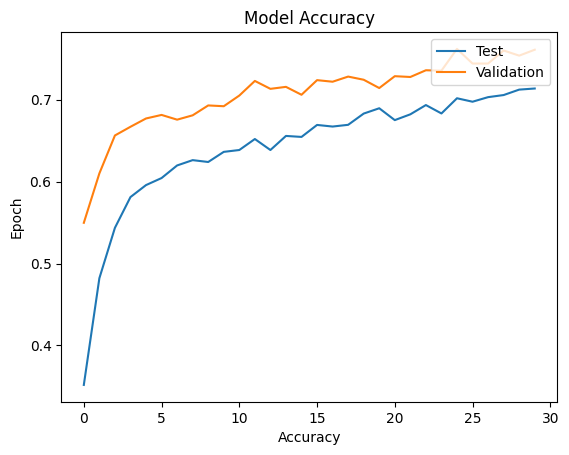

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [ ]:
custom_inception_model.save('/content/drive/MyDrive/adp.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import tensorflow as tf

In [ ]:
model=load_model('/content/drive/MyDrive/adp.h5')

In [ ]:
def preprocess_image(image_path):
    img=image.load_img(image_path,target_size=(180,180,3))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=tf.keras.applications.resnet50.preprocess_input(img)
    return img

In [ ]:
categories=sorted(os.listdir('/content/Alzheimer_s Dataset/train'))

In [ ]:
print("Categories: ",categories)

Categories:  ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
def predict_category(image_path):
    processed_img=preprocess_image(image_path)
    predictions=model.predict(processed_img)
    category_index=np.argmax(predictions,axis=1)[0]
    categories=['Mild Dementia','Moderate Dementia','Non Demented','Very mild Dementia']
    predicted_category=categories[category_index]
    return predicted_category

In [ ]:
input_image_path='/content/drive/MyDrive/Alzheimer_s Dataset/test/NonDemented/26 (100).jpg'

In [ ]:
predicted_category=predict_category(input_image_path)

1/1 [==============================] - 1s 1s/step


In [ ]:
print('Predicted Category:',predicted_category)

Predicted Category: Non Demented
